In [109]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
# Read Data
df = pd.read_csv('aapl_ok.csv',sep=';')
df = df[['fecha', 'Ingresos']]
df

,fecha,Ingresos
0,12/29/1989,"1493,4"
1,03/30/1990,"1346,2"
2,06/29/1990,"1364,8"
3,09/28/1990,"1354,1"
4,12/28/1990,"1675,5"
...,...,...
122,06/27/2020,59685
123,09/26/2020,64698
124,12/26/2020,111439
125,03/27/2021,89584


In [111]:

df['fecha'] = pd.to_datetime(df['fecha'])
df = df.set_index('fecha')
df.head()

,Ingresos
fecha,
1989-12-29,"1493,4"
1990-03-30,"1346,2"
1990-06-29,"1364,8"
1990-09-28,"1354,1"
1990-12-28,"1675,5"


In [112]:
df.dtypes

Ingresos    object
dtype: object

In [113]:
df['Ingresos'] = df['Ingresos'].str.replace(',', '.').astype('float64')
print(df.head())
df.dtypes

            Ingresos
fecha               
1989-12-29    1493.4
1990-03-30    1346.2
1990-06-29    1364.8
1990-09-28    1354.1
1990-12-28    1675.5


Ingresos    float64
dtype: object

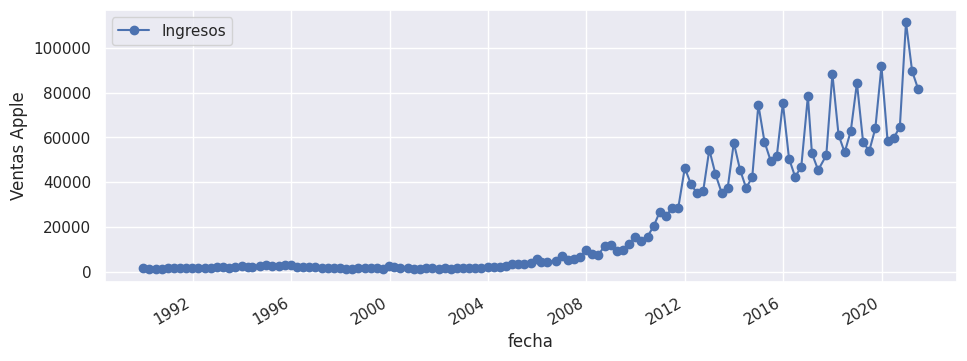

In [114]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
ax = df.plot( y = 'Ingresos', marker='o', linestyle='-')
ax.set_ylabel('Ventas Apple');

### Los ingresos de Apple son no estacionarios tanto en varianza como en media ya que las propiedades estadísticas de la serie cambian con el tiempo. En la media se ve claramente en la tendencia que tienen los datos que no sabría decir si es multiplicativa o aditiva. En cuanto al componente estacional, es claramente multiplicativo ya que la variabilidad de los datos crece proporcionalmente con la tendencia  

In [115]:

# Agrupar por año y sumar los ingresos
df_anual = df.resample('Y').sum()

# Mostrar las ventas anuales
df_anual

,Ingresos
fecha,
1989-12-31,1493.4
1990-12-31,5740.6
1991-12-31,6496.0
1992-12-31,7224.2
1993-12-31,8445.6
1994-12-31,9551.9
1995-12-31,11378.0
1996-12-31,8814.0
1997-12-31,6530.0


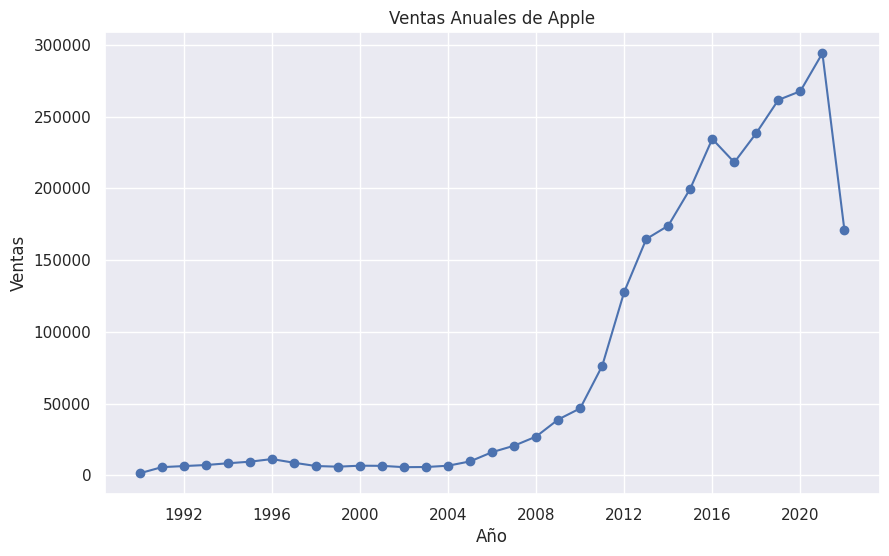

In [116]:
import matplotlib.pyplot as plt

# Suponiendo que 'ventas_anuales' es tu serie temporal agrupada por año
# Asegúrate de haber ejecutado el código para obtener 'ventas_anuales'

# Graficar las ventas anuales
plt.figure(figsize=(10, 6))
plt.plot(df_anual.index, df_anual['Ingresos'], marker='o', linestyle='-')
plt.title('Ventas Anuales de Apple')
plt.xlabel('Año')
plt.ylabel('Ventas')  # Ajusta la etiqueta según la escala de tus datos
plt.grid(True)
plt.show()


### Como podemos ver en el gráfico de las ventas anuales, el 2020 no tuvo tanta repercusión en Apple que siguió con su tendencia alcista en sus ingresos. El ultimo dato podemos quitarlo ya que solo tenemos los dos primeros trimestres del 2021 y por lo tanto es obviamente menor que en el año anterior

In [117]:

# Calcular las tasas de crecimiento anuales
df_anual['Crecimiento'] = df_anual['Ingresos'].pct_change() * 100
df_anual_cleaned = df_anual.dropna(subset=['Crecimiento'])
# Extraer el año de las fechas
df_anual_cleaned['Año'] = df_anual_cleaned.index.year

df_anual['Crecimiento']

/tmp/ipykernel_1749/1157185063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_anual_cleaned['Año'] = df_anual_cleaned.index.year


fecha
1989-12-31           NaN
1990-12-31    284.398018
1991-12-31     13.158903
1992-12-31     11.209975
1993-12-31     16.907062
1994-12-31     13.099129
1995-12-31     19.117662
1996-12-31    -22.534716
1997-12-31    -25.913320
1998-12-31     -6.998469
1999-12-31     11.427630
2000-12-31     -1.773312
2001-12-31    -13.780653
2002-12-31      1.884488
2003-12-31     15.447851
2004-12-31     44.830144
2005-12-31     65.830175
2006-12-31     27.788758
2007-12-31     30.808642
2008-12-31     43.890182
2009-12-31     19.945559
2010-12-31     63.318918
2011-12-31     67.587798
2012-12-31     28.821740
2013-12-31      5.650112
2014-12-31     14.832866
2015-12-31     17.337337
2016-12-31     -6.962123
2017-12-31      9.360988
2018-12-31      9.674011
2019-12-31      2.320612
2020-12-31      9.881838
2021-12-31    -41.857310
Freq: A-DEC, Name: Crecimiento, dtype: float64

### Tanto en la tabla de arriba como en el gráfico de abajo podemos ver las tasas de crecimiento anuales de Apple. El dato de 1990 y el de 2021 podemos descartarlos ya que al no tener datos del año entero de 1989 ni de 2021 las tasas se disparan tanto hacia arriba como hacia abajo

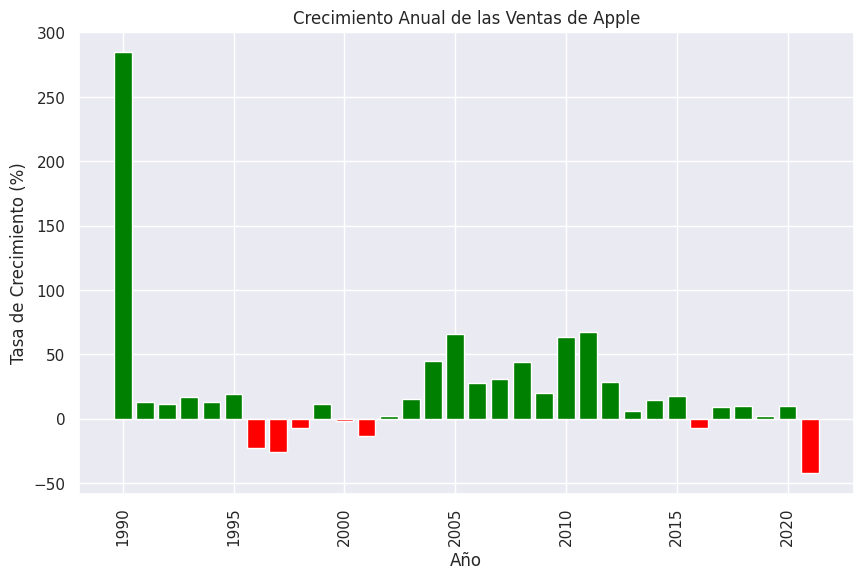

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'df_anual_cleaned' es tu DataFrame después de la limpieza
# Asegúrate de haber ejecutado el código para obtener 'df_anual_cleaned'

# Graficar las tasas de crecimiento anuales con colores diferentes
plt.figure(figsize=(10, 6))

# Crear una lista de colores basada en el signo de 'Crecimiento'
colores = ['green' if x >= 0 else 'red' for x in df_anual_cleaned['Crecimiento']]

# Utilizar Matplotlib directamente para la barplot y asignar colores
plt.bar(df_anual_cleaned['Año'], df_anual_cleaned['Crecimiento'], color=colores)

plt.title('Crecimiento Anual de las Ventas de Apple')
plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento (%)')
plt.xticks(rotation=90)

plt.show()


In [119]:
trimestral=df.resample("q").last()
#ko_ts=ko_df['Ingresos'].astype('float64').to_period('Q')
trimestral.tail()

,Ingresos
fecha,
2020-06-30,59685.0
2020-09-30,64698.0
2020-12-31,111439.0
2021-03-31,89584.0
2021-06-30,81434.0


In [120]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Comportamiento Estacional')

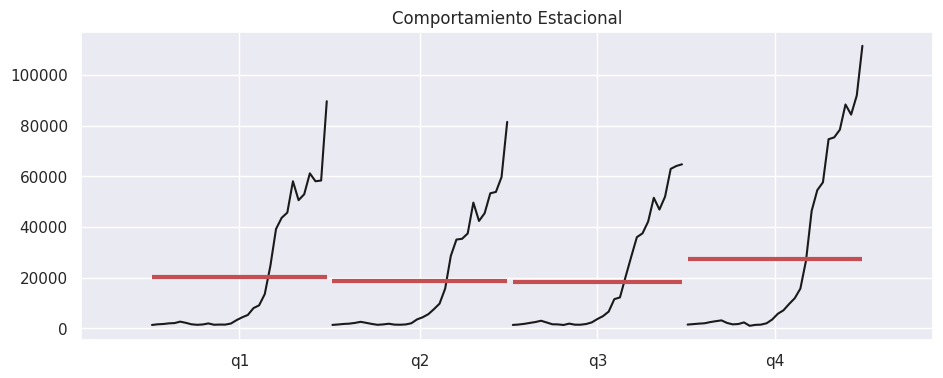

In [121]:
ax = plt.gca()
sm.graphics.tsa.quarter_plot(trimestral['Ingresos'],ax=ax)
ax.set_title('Comportamiento Estacional')

### Aqui podemos ver que el cuarto y último trimestre es siempre mejor para apple , probablemente por los regalos de Navidad de diciembre


In [122]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

119 8


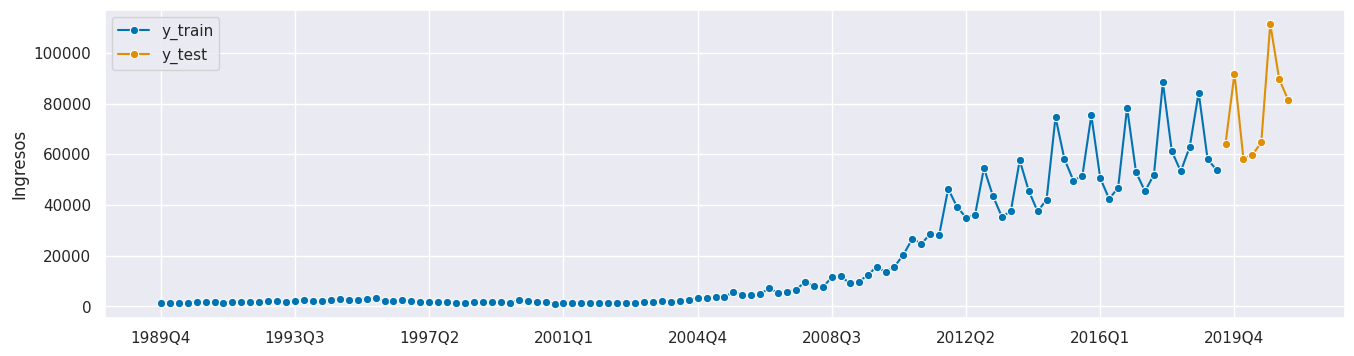

In [123]:
y_train, y_test = temporal_train_test_split(y = trimestral['Ingresos'].astype('float64').to_period('Q'), test_size=8)
# we will try to forecast y_test from y_train
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [124]:
from sktime.forecasting.ets import AutoETS

In [125]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 15)

# step 3: specifying the forecasting algorithm
aapl_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)

aapl_auto_model.fit(y_train)
print(aapl_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  119
Model:                       ETS(MAM)   Log Likelihood                -968.025
Date:                Mon, 09 Oct 2023   AIC                           1956.050
Time:                        09:52:10   BIC                           1983.841
Sample:                    12-31-1989   HQIC                          1967.335
                         - 06-30-2019   Scale                            0.018
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.4225      0.055      7.739      0.000       0.316       0.530
smoothing_trend        0.1685      0.034      4.890      0.000       0.101       0.236
smoothing_seasonal  

In [126]:
# step 5: querying predictions
aapl_pred = aapl_auto_model.predict(fh)
print(aapl_pred)

2019Q3    58581.326742
2019Q4    85963.040159
2020Q1    59751.798679
2020Q2    53079.526151
2020Q3    58323.465808
2020Q4    85584.234646
2021Q1    59488.205472
2021Q2    52845.108937
2021Q3    58065.604875
2021Q4    85205.429133
2022Q1    59224.612265
2022Q2    52610.691722
2022Q3    57807.743942
2022Q4    84826.623619
Freq: Q-DEC, Name: Ingresos, dtype: float64


In [127]:
aapl_pred_ints = aapl_auto_model.predict_interval(fh, coverage=0.9)
aapl_pred_ints

Ingresos               
                 0.9               
               lower          upper
2019Q3  45461.354444   71094.523452
2019Q4  64828.484915  108566.769909
2020Q1  43041.899904   78970.757206
2020Q2  35408.846312   75584.607774
2020Q3  32481.353348   91141.899418
2020Q4  44241.137090  141806.113331
2021Q1  25861.633878  105472.429713
2021Q2  19305.258442   97506.020267
2021Q3  16143.959799  118466.825003
2021Q4  17138.292722  180497.720434
2022Q1   6628.638798  135906.812771
2022Q2   1599.985018  129464.450745
2022Q3  -3410.814950  156074.720503
2022Q4 -14037.090345  234143.823128

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

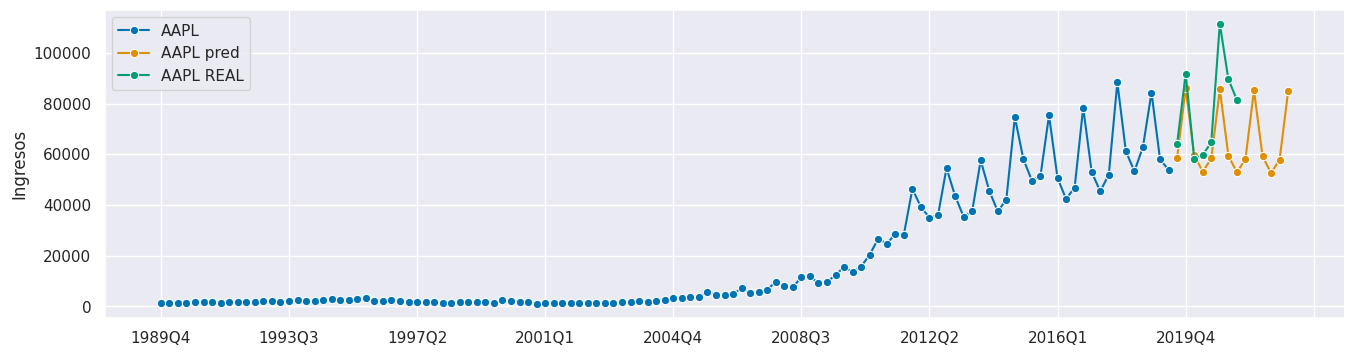

In [128]:
# optional: plotting predictions and past data
plot_series(y_train, aapl_pred,y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

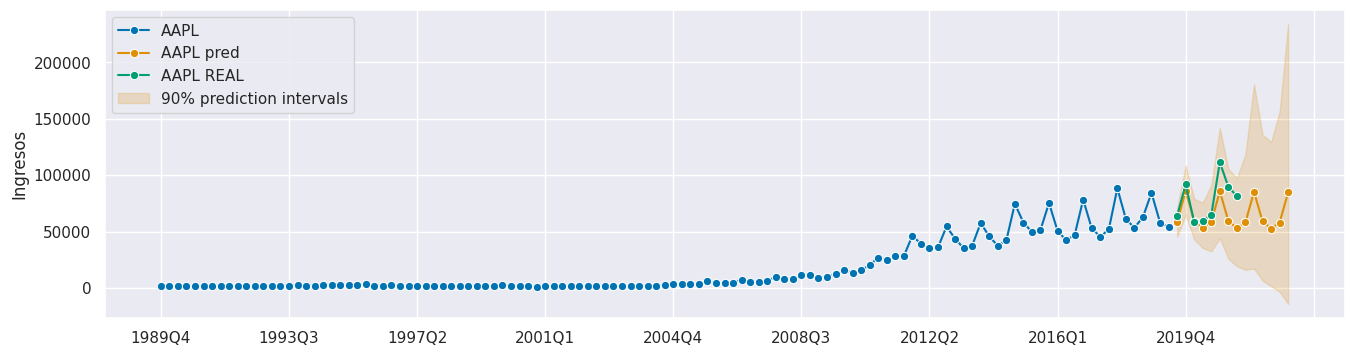

In [129]:
fig, ax = plot_series(y_train, aapl_pred, y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    aapl_pred_ints[('Ingresos', 0.9, 'lower')],
    aapl_pred_ints[('Ingresos', 0.9, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"90% prediction intervals",
)
ax.legend(loc='upper left')

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

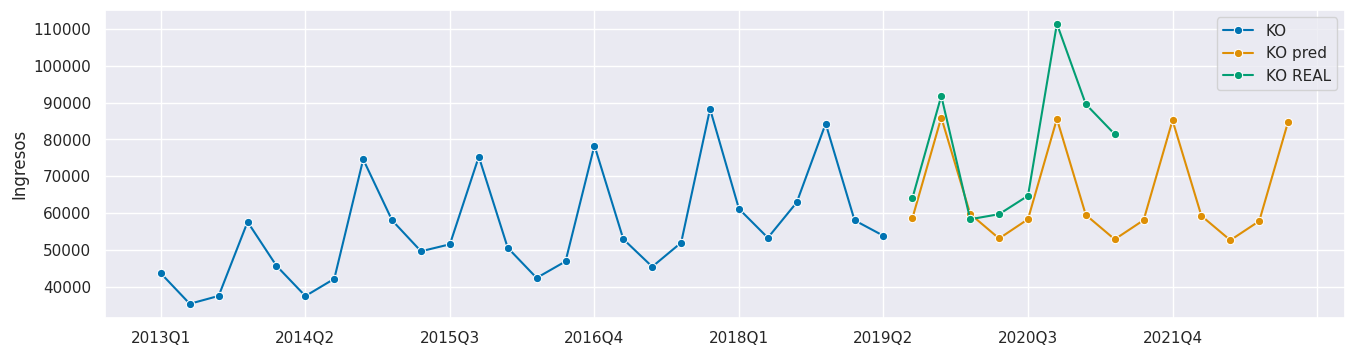

In [130]:
plot_series(y_train["2013":], aapl_pred,y_test, labels=["KO", "KO pred", "KO REAL"])

In [131]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, aapl_pred[0:8])

0.16273953082780607

In [132]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, aapl_pred[0:8])

317747115.49760485

In [133]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, aapl_pred[0:8])

17825.462560550983

In [134]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend='multiplicative', seasonal='multiplicative', sp=4) #el error lo toma aditivo si no pongo nada
forecaster.fit(y_train)

/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ExponentialSmoothing(seasonal='multiplicative', sp=4, trend='multiplicative')

In [135]:
fh = np.arange(1, 15)
y_pred = forecaster.predict(fh)
y_pred

2019Q3     61466.439517
2019Q4     94037.269536
2020Q1     67629.948649
2020Q2     60848.128567
2020Q3     70158.713485
2020Q4    107335.546065
2021Q1     77193.835002
2021Q2     69452.964117
2021Q3     80080.205011
2021Q4    122514.397812
2022Q1     88110.197943
2022Q2     79274.652126
2022Q3     91404.743846
2022Q4    139839.766243
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [136]:
print(forecaster._fitted_forecaster.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Ingresos   No. Observations:                  119
Model:             ExponentialSmoothing   SSE                     1042754890.323
Optimized:                         True   AIC                           1918.335
Trend:                   Multiplicative   BIC                           1940.568
Seasonal:                Multiplicative   AICC                          1920.372
Seasonal Periods:                     4   Date:                 Mon, 09 Oct 2023
Box-Cox:                          False   Time:                         09:52:12
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6767857                alpha                 True
smoothing_trend          

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

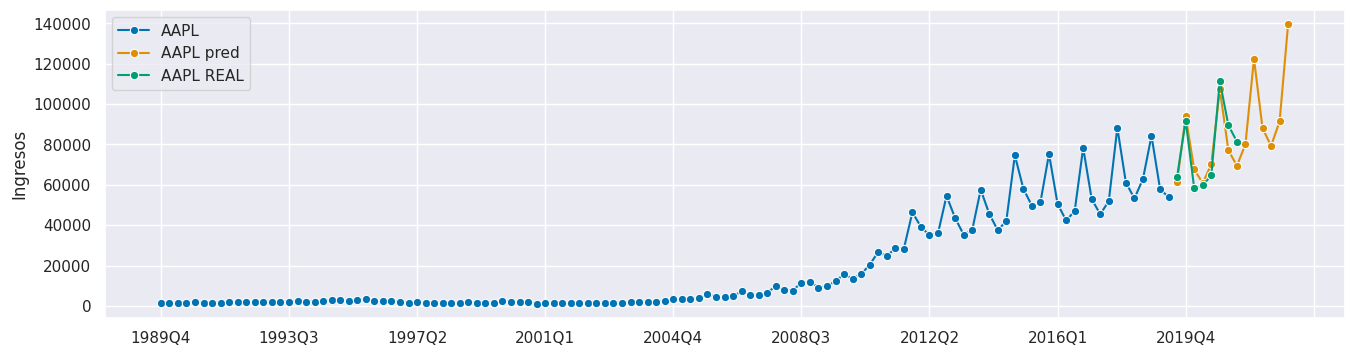

In [137]:
#plot_series(y, y_pred, labels=["KO", "KO pred"])
plot_series(y_train, y_pred,y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

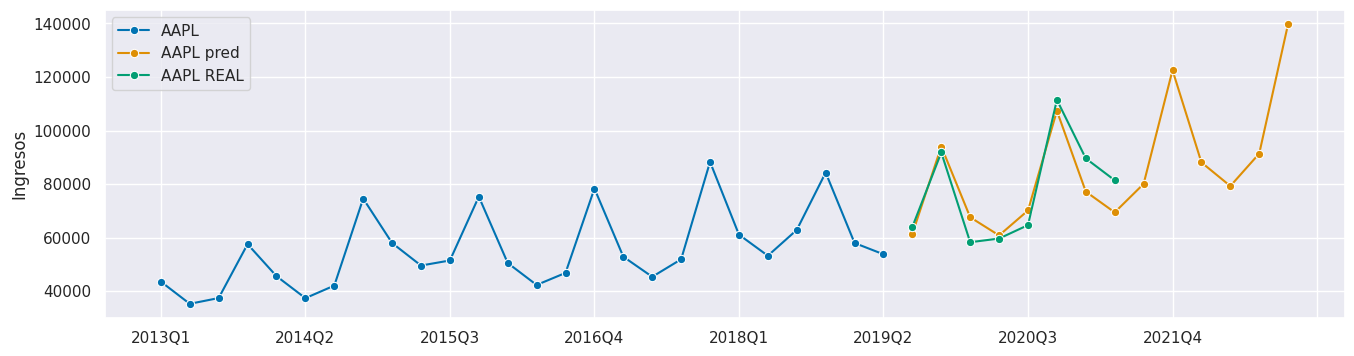

In [138]:
plot_series(y_train["2013":], y_pred,y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])

In [139]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, y_pred[0:8])

0.08128344746328568

In [140]:
from sktime.performance_metrics.forecasting import MeanSquaredError
mse = MeanSquaredError()
mse(y_test, y_pred[0:8])

55427683.61878385

In [141]:
rmse = MeanSquaredError(square_root=True)
rmse(y_test, y_pred[0:8])

7444.977073086515

### Elegimos como modelo el de tendencia y estacionaldad multiplicativa ya que su error es mucho menor que en el modelo MAM. 
### Pasa de un mape del 16% en el modelo MAM a uno de 8% en el AMM. Como podemos ver en el gráfico la prediccion se acerca mucho mas a la realidad

In [142]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 7)

y = trimestral['Ingresos'].astype('float64').to_period('Q')

from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend='multiplicative', seasonal='multiplicative', sp=4) #el error lo toma aditivo si no pongo nada
forecaster.fit(y)


/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


ExponentialSmoothing(seasonal='multiplicative', sp=4, trend='multiplicative')

In [143]:
y_pred = forecaster.predict(fh)
y_pred

2021Q3     91136.952515
2021Q4    143326.642845
2022Q1    102016.851362
2022Q2     93273.320662
2022Q3    104033.771451
2022Q4    163608.841342
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [144]:
print(forecaster._fitted_forecaster.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Ingresos   No. Observations:                  127
Model:             ExponentialSmoothing   SSE                     1577074407.705
Optimized:                         True   AIC                           2090.501
Trend:                   Multiplicative   BIC                           2113.254
Seasonal:                Multiplicative   AICC                          2092.397
Seasonal Periods:                     4   Date:                 Mon, 09 Oct 2023
Box-Cox:                          False   Time:                         09:52:13
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.7121429                alpha                 True
smoothing_trend          

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

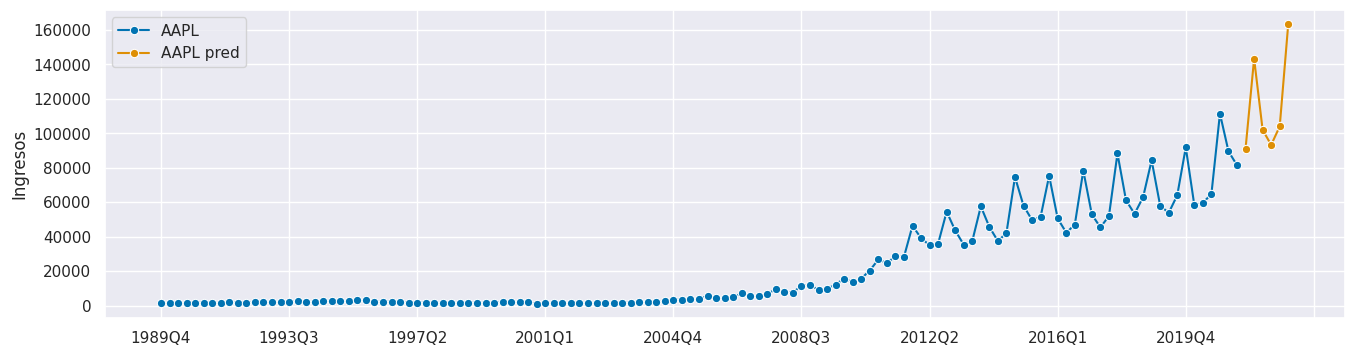

In [145]:
plot_series(y, y_pred, labels=["AAPL", "AAPL pred"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

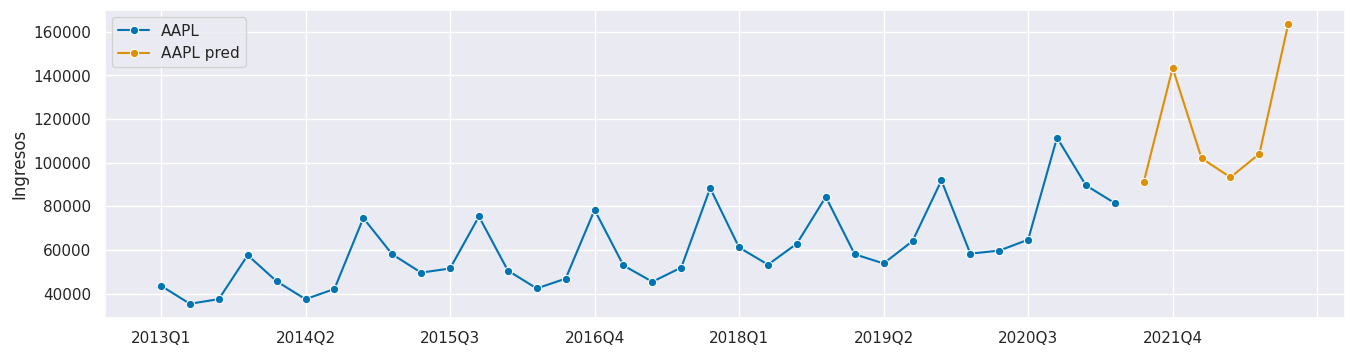

In [146]:
plot_series(y['2013':], y_pred, labels=["AAPL", "AAPL pred"])

/workspaces/TimeSeries/.conda/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

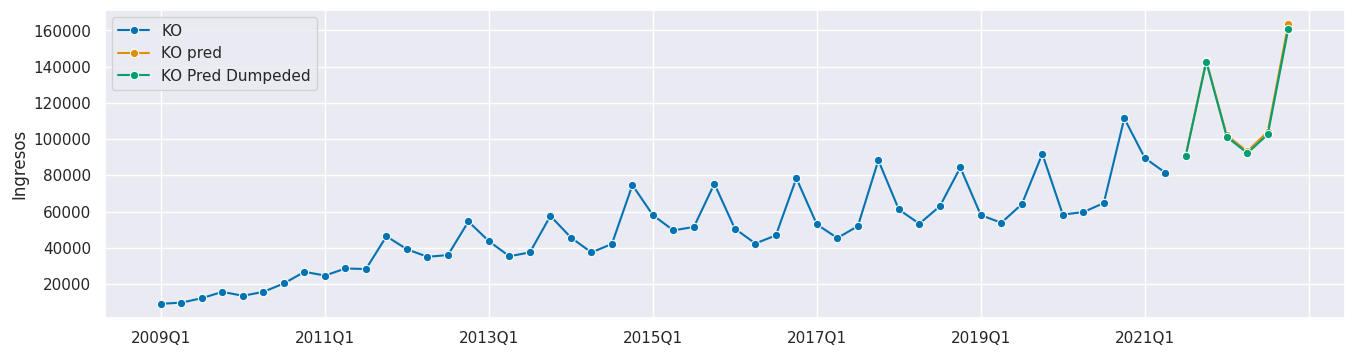

In [147]:
forecaster = ExponentialSmoothing(trend="mul",seasonal="mul",damped_trend=True, sp=4)
forecaster.fit(y)
y_pred_dump = forecaster.predict(fh)
plot_series(y["2009":], y_pred, y_pred_dump,labels=["KO", "KO pred","KO Pred Dumpeded"])

In [148]:
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

In [149]:
trimestral_q = trimestral['Ingresos'].astype('float64').to_period('Q')
trimestral_q.tail()

fecha
2020Q2     59685.0
2020Q3     64698.0
2020Q4    111439.0
2021Q1     89584.0
2021Q2     81434.0
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [150]:
# Log Transformer Function
from sktime.transformations.series.boxcox import LogTransformer


transformer = LogTransformer()
trimestral_log= transformer.fit_transform(trimestral_q)
trimestral_log.tail()

fecha
2020Q2    10.996836
2020Q3    11.077486
2020Q4    11.621233
2021Q1    11.402932
2021Q2    11.307548
Freq: Q-DEC, Name: Ingresos, dtype: float64

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

119 8


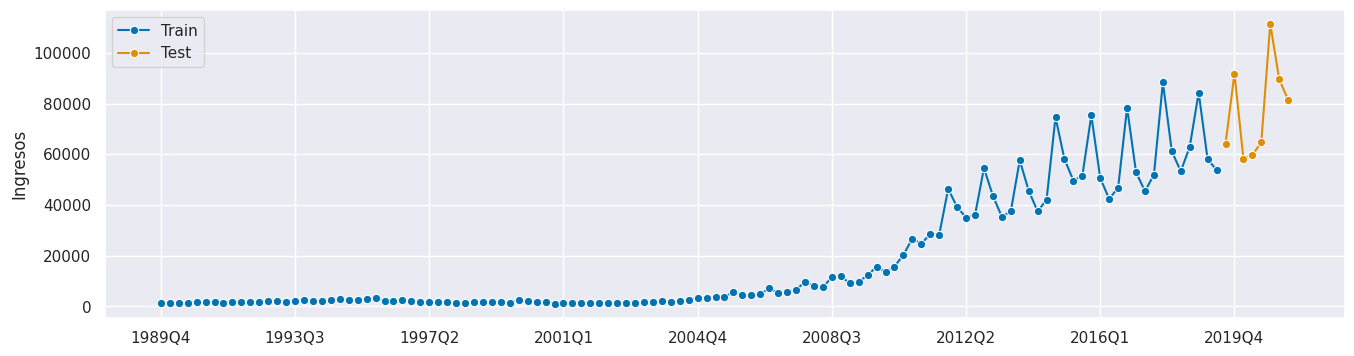

In [151]:
y_train, y_test = temporal_train_test_split(y =trimestral_q, test_size=8)
log_y_train, log_y_test = temporal_train_test_split(y =trimestral_log, test_size=8)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [152]:
# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon
fh

array([1, 2, 3, 4, 5, 6, 7, 8])

In [153]:
# Sktime Auto ARIMA Function
from sktime.forecasting.arima import AutoARIMA

#  Auto ARIMA Model
forecaster = AutoARIMA(sp=4,suppress_warnings=True)
forecaster.fit(log_y_train)
print(forecaster.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  119
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 4)   Log Likelihood                  58.362
Date:                           Mon, 09 Oct 2023   AIC                           -108.724
Time:                                   09:52:29   BIC                            -97.642
Sample:                               12-31-1989   HQIC                          -104.224
                                    - 06-30-2019                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3363      0.089     -3.795      0.000      -0.510      -0.163
ar.S.L4        0.9156      0.062     14.822

In [154]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

2019Q3    60183.674939
2019Q4    83757.822329
2020Q1    61526.178912
2020Q2    56094.939194
2020Q3    62284.140153
2020Q4    84295.715654
2021Q1    63555.016644
2021Q2    58398.541302
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [155]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError

mean_absolute_percentage_error(log_y_test, log_y_pred)

0.013892973614064611

In [156]:
# MAPE 
# Orignal Time Serie

mean_absolute_percentage_error(y_test, np.exp(log_y_pred))

0.13969639733058992

In [157]:
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred)

0.20210986175416867

In [158]:
#Mean Squared Error
rmse = MeanSquaredError(square_root=True)
rmse(y_test, np.exp(log_y_pred))

16022.608324659994

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

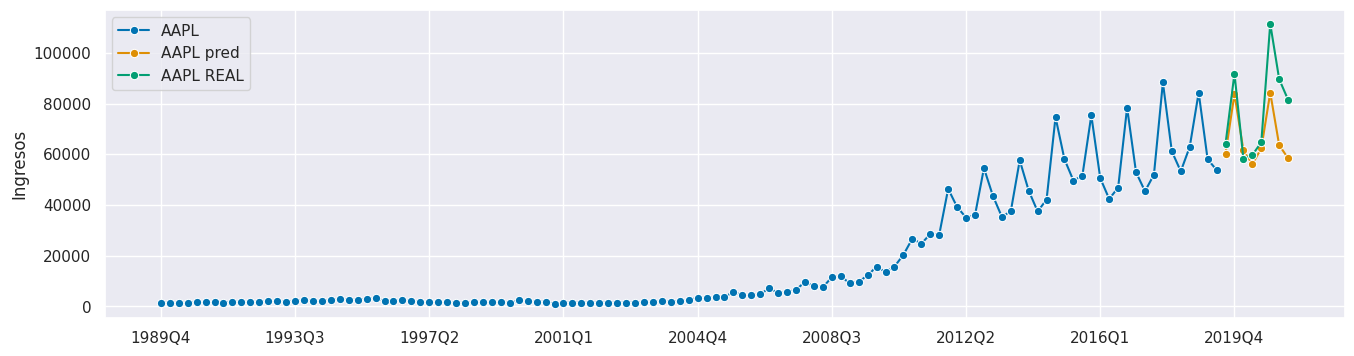

In [159]:
# Plotting predictions and past data
plot_series(y_train, np.exp(log_y_pred),y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

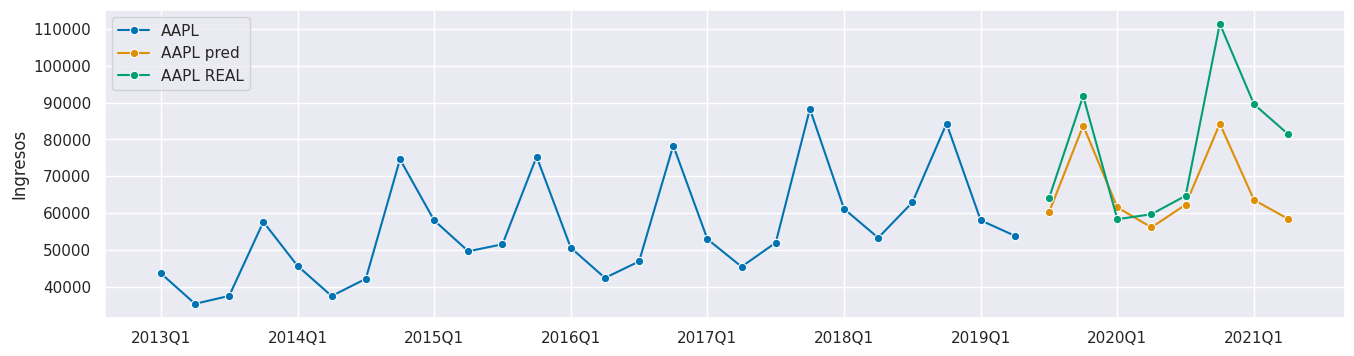

In [160]:
# Zoom 2013 -2021
plot_series(y_train["2013":], np.exp(log_y_pred),y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])

In [161]:
# Forecast Horizon
fh = np.arange(6) + 1  # forecasting horizon
fh

array([1, 2, 3, 4, 5, 6])

In [162]:
#  Auto ARIMA Model

forecaster = AutoARIMA(sp=4,suppress_warnings=True)
forecaster.fit(trimestral_log)

AutoARIMA(sp=4, suppress_warnings=True)

In [163]:
#  Auto ARIMA Model Summary
print(forecaster.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  127
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 4)   Log Likelihood                  64.270
Date:                             Mon, 09 Oct 2023   AIC                           -118.539
Time:                                     09:52:46   BIC                           -104.358
Sample:                                 12-31-1989   HQIC                          -112.778
                                      - 06-30-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3231      0.079     -4.096      0.000      -0.478      -0.168
ar.L2         -0.1575      

In [164]:
#  Auto ARIMA Forecast
log_y_pred = forecaster.predict(fh)
# Original Time series (Invert log transformation)
np.exp(log_y_pred)

2021Q3     89895.159267
2021Q4    134667.710973
2022Q1    102010.214502
2022Q2     95842.759213
2022Q3    105437.402726
2022Q4    153160.635738
Freq: Q-DEC, Name: Ingresos, dtype: float64

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

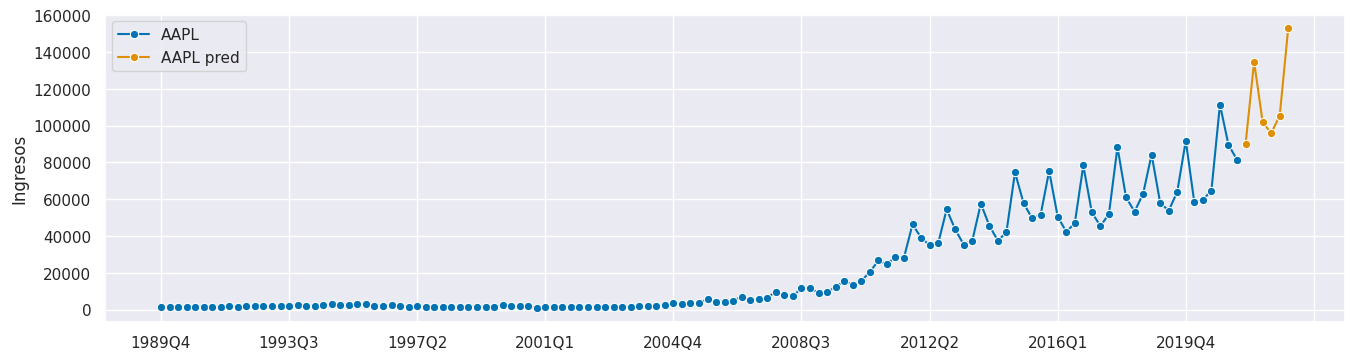

In [165]:
# Plotting predictions and past data
plot_series(trimestral_q, np.exp(log_y_pred), labels=["AAPL", "AAPL pred"])

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Ingresos'>)

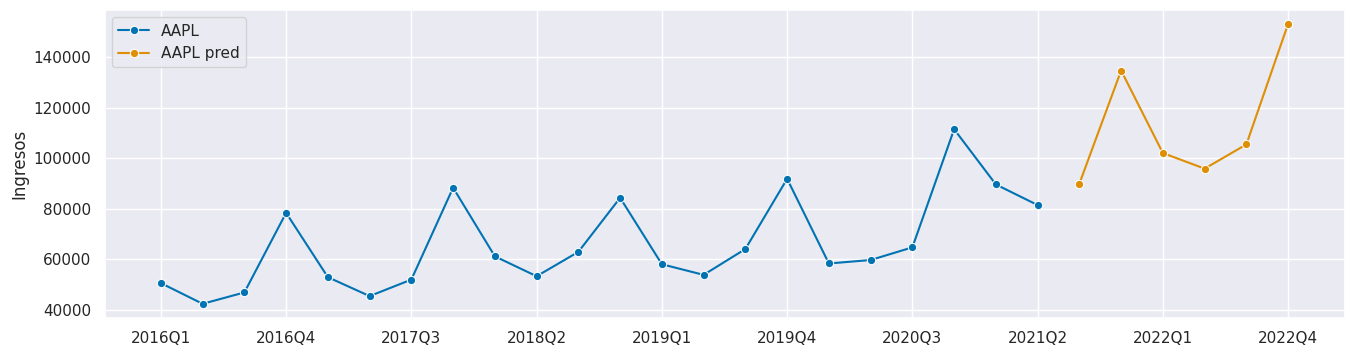

In [166]:
# Plotting predictions and past data
plot_series(trimestral_q["2016":], np.exp(log_y_pred), labels=["AAPL", "AAPL pred"])

In [167]:
#comparar predicciones modelo ETS y ARIMA
print(y_pred)
np.exp(log_y_pred)


2021Q3     91136.952515
2021Q4    143326.642845
2022Q1    102016.851362
2022Q2     93273.320662
2022Q3    104033.771451
2022Q4    163608.841342
Freq: Q-DEC, Name: Ingresos, dtype: float64


2021Q3     89895.159267
2021Q4    134667.710973
2022Q1    102010.214502
2022Q2     95842.759213
2022Q3    105437.402726
2022Q4    153160.635738
Freq: Q-DEC, Name: Ingresos, dtype: float64

### como podemos ver, las predicciones son bastante parecidas pese a que el modelo ARIMA tiene un MAPE de 13.96% y el ETS uno mucho menor (8%). El modelo ETS tiene una predicción de ingresos mayor que el ARIMA en el Q4 de los dos años que se están estudiando (2021Q4 y 2022Q4).
### **Aunque las predicciones sean parecidas, dado que el MAPE y las demás medidas de accuracy son mejores en el ETS, nos quedaremos con este modelo como mejor predicción de los ingresos de Apple**

2021Q3     91136.952515
2021Q4    143326.642845
2022Q1    102016.851362
2022Q2     93273.320662
2022Q3    104033.771451
2022Q4    163608.841342
Freq: Q-DEC, Name: Ingresos, dtype: float64


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

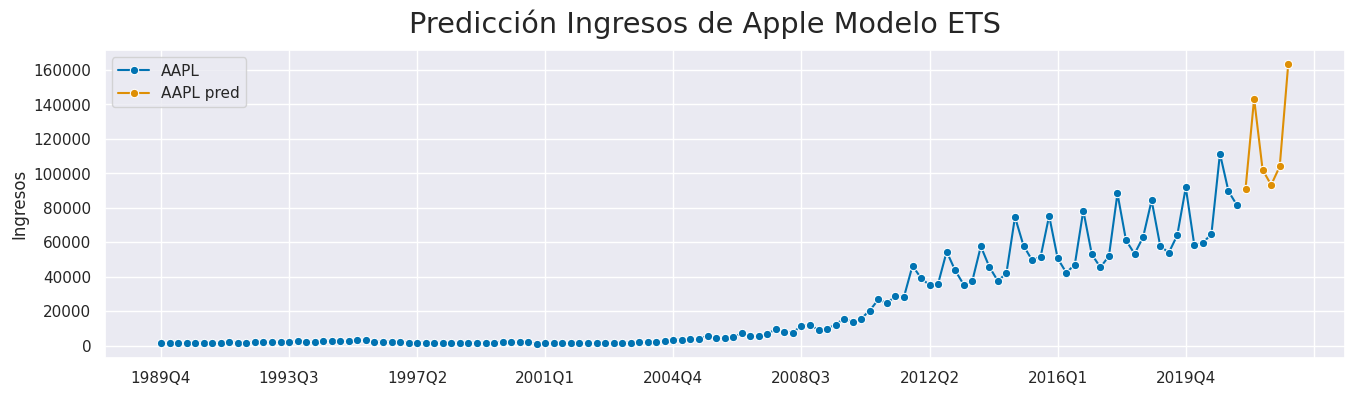

In [168]:
plot_series(y, y_pred, labels=["AAPL", "AAPL pred"], title="Predicción Ingresos de Apple Modelo ETS")
print(y_pred)

In [177]:
df_combinado = pd.concat([y, y_pred])
df_combinado.tail(16)

2019Q1     58015.000000
2019Q2     53809.000000
2019Q3     64040.000000
2019Q4     91819.000000
2020Q1     58313.000000
2020Q2     59685.000000
2020Q3     64698.000000
2020Q4    111439.000000
2021Q1     89584.000000
2021Q2     81434.000000
2021Q3     91136.952515
2021Q4    143326.642845
2022Q1    102016.851362
2022Q2     93273.320662
2022Q3    104033.771451
2022Q4    163608.841342
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [170]:
df_comb_anual = df_combinado.resample('Y').sum()
df_comb_anual.tail(2)

2021    405481.595360
2022    462932.784817
Freq: A-DEC, Name: Ingresos, dtype: float64

### La predicción de las ventas anuales para 2021 y 2022 es de 405B y 462B respectivamente. Esto es un número mucho más elevado que el de las predicciones de Barclays (368b en 2021 y 378b en 2022) que seguramente hayan utilizado un modelo damped para suavizar las predicciones y ser mas conservadores.
Nuestra predicción para el Q3 de 2021 es de 91b mientras que la de Barclays es de 86b.

In [173]:
df_combinado1 = pd.concat([y, np.exp(log_y_pred)])
df_combinado1.tail(10)



2020Q3     64698.000000
2020Q4    111439.000000
2021Q1     89584.000000
2021Q2     81434.000000
2021Q3     89895.159267
2021Q4    134667.710973
2022Q1    102010.214502
2022Q2     95842.759213
2022Q3    105437.402726
2022Q4    153160.635738
Freq: Q-DEC, Name: Ingresos, dtype: float64

In [174]:
df_comb_anual1 = df_combinado1.resample('Y').sum()
df_comb_anual1.tail(2)

2021    395580.870239
2022    456451.012178
Freq: A-DEC, Name: Ingresos, dtype: float64

### Si lo hacemos con el modelo ARIMA las predicciones son un poco mas bajas pero siguen estando muy por encima de las del Barclays


Ahora vamos a ver el efecto del covid en Apple. Esto lo haremos poniendo el test justo en el cuarto antes del covid para que asi el modelo prediga cuantos ingresos hubiese tenido apple sin covid (los modelos son incapaces de predecir un suceso asi)

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

122 5


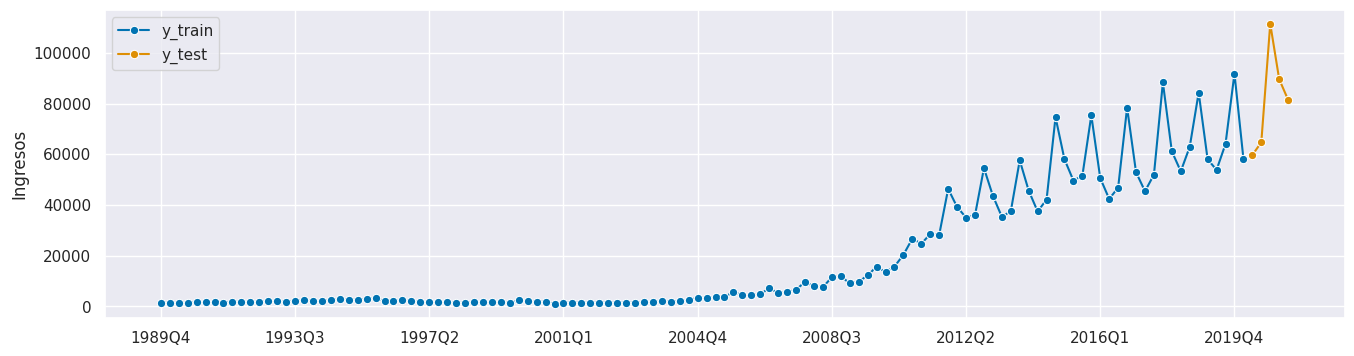

In [180]:
y_train, y_test = temporal_train_test_split(y = trimestral['Ingresos'].astype('float64').to_period('Q'), test_size=5)
# we will try to forecast y_test from y_train
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [187]:
# step 2: specifying forecasting horizon
fh = np.arange(1, 10)

# step 3: specifying the forecasting algorithm
aapl_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)

aapl_auto_model.fit(y_train)
print(aapl_auto_model.summary())

                                 ETS Results                                  
Dep. Variable:               Ingresos   No. Observations:                  122
Model:                       ETS(MAM)   Log Likelihood                -998.703
Date:                Mon, 09 Oct 2023   AIC                           2017.407
Time:                        10:44:16   BIC                           2045.447
Sample:                    12-31-1989   HQIC                          2028.796
                         - 03-31-2020   Scale                            0.018
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.4199      0.054      7.747      0.000       0.314       0.526
smoothing_trend        0.1674      0.034      4.955      0.000       0.101       0.234
smoothing_seasonal  

In [188]:
# step 5: querying predictions
aapl_pred = aapl_auto_model.predict(fh)
print(aapl_pred)

aapl_pred_ints = aapl_auto_model.predict_interval(fh, coverage=0.9)
aapl_pred_ints



2020Q2    55007.748402
2020Q3    62446.368798
2020Q4    89219.705428
2021Q1    59578.194981
2021Q2    54936.419305
2021Q3    62365.367709
2021Q4    89103.938287
2022Q1    59500.864134
2022Q2    54865.090209
Freq: Q-DEC, Name: Ingresos, dtype: float64


Ingresos               
                 0.9               
               lower          upper
2020Q2  42520.995762   67474.901768
2020Q3  47214.539968   78347.823304
2020Q4  61174.686244  117330.924672
2021Q1  38323.891453   84426.174239
2021Q2  29472.230953   85698.031628
2021Q3  31342.398435  101234.640415
2021Q4  38060.606952  154651.627953
2022Q1  22032.122823  111618.444463
2022Q2  14621.366323  115320.299959

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

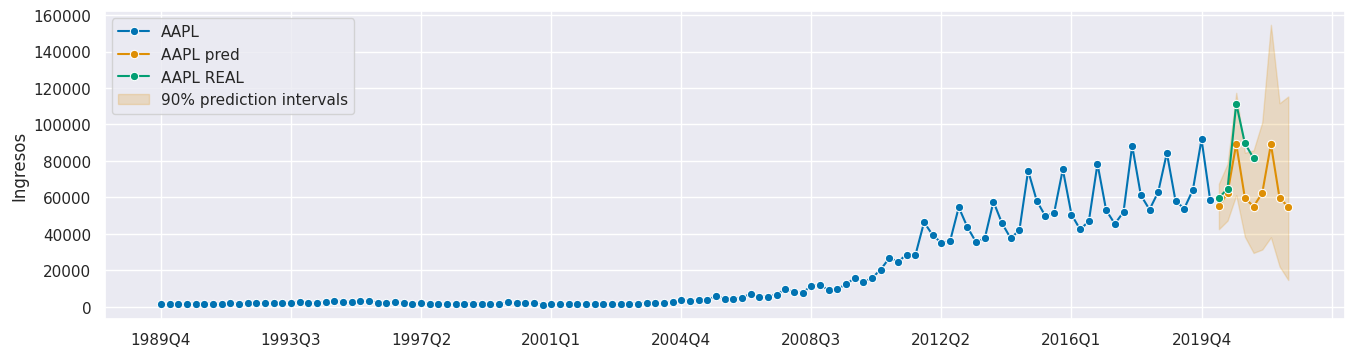

In [190]:
fig, ax = plot_series(y_train, aapl_pred, y_test, labels=["AAPL", "AAPL pred", "AAPL REAL"])
ax.fill_between(
    ax.get_lines()[-2].get_xdata(),
    aapl_pred_ints[('Ingresos', 0.9, 'lower')],
    aapl_pred_ints[('Ingresos', 0.9, 'upper')],
    alpha=0.2,
    color=ax.get_lines()[-2].get_c(),
    label=f"90% prediction intervals",
)
ax.legend(loc='upper left')

En este gráfico podemos ver que el covid no tuvo efecto alguno en Apple. De hecho, las predicciones son mas bajas de lo que realmente pasó. Es decir que el modelo, que no puede predecir el covid, tiene unas predicciones mas bajas de ingresos en 2020 de lo que realmente fueron. Esto quiere decir que Apple no solo no perdió ingresos en el covid sino que los aumentó en comparación con las predicciones del modelo ETS(MAM).
Ademas podemos observar que la realidad se encuentra dentro de los intervalos al 90% de confianza lo que significa que esta dentro de lo esperado para el modelo